In [162]:
import pandas as pd

df_event = pd.read_csv('event_clean.csv', encoding ='utf-8')
df_product = pd.read_csv('products_clean.csv', encoding='utf-8')

#print(df_event)

Analyzing of multiple outcomes

#define the outcomes column as list
df_event['outcomes'] = df_event['outcomes'].apply(
    lambda x: [s.strip().lower().replace(".", "") for s in x.split(',')] if isinstance(x, str) else x
)

In [163]:
#define the outcomes column as list
df_event['outcomes'] = df_event['outcomes'].apply(
    lambda x: [s.strip().lower().replace(".", "") for s in x.split(',')] if isinstance(x, str) else x
)

#Possible Outcomes defining
all_outcomes = [
    'death',
    'disability',
    'hospitalization',
    'other outcome',
    'visited a health care provider',
    'other serious or important medical event',
    'visited emergency room',
    'allergic reaction',
    'other serious outcome',
    'congenital anomaly',
    'required intervention',
    'life threatening'
]

#Create binary indicator columns
for outcome in all_outcomes:
    col_outcome = outcome.replace(" ", "_").lower()
    df_event[col_outcome] = df_event['outcomes'].apply(lambda x: int(outcome in x if isinstance(x, list) else False))


#count the total occurences of each outcome
outcome_cols = [o.replace(" ", "_").lower() for o in all_outcomes]
print(df_event[outcome_cols].sum().sort_values(ascending=False))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_event[outcome_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

#define group dictionaries
critical_outcomes = {
    "death", "life threatening"
}
severe_outcomes = {
    "hospitalization", "required intervention", "disability", "congenital anomaly"
}
other_outcomes = {
    "visited emergency room", "allergic reaction", "other outcome", 
    "other serious or important medical event",
    "other serious outcome", "other serious or important medical event"
}

#define the function that keeps single outcome/assign group
def group_outcome(row):
    if not isinstance(row, list):
        return np.nan

    #clean outcomes
    cleaned_outcomes = [o.strip().lower() for o in row if isinstance(o, str)]

    #keep a record unchanged if it has only one outcome
    if len(row) == 1:
        return row[0].strip().lower().replace(" ", "_")

    #multiple outcomes -> group them
    groups = set()
    for o in cleaned_outcomes:
        if o in critical_outcomes:
            groups.add("critical")
        if o in severe_outcomes:
            groups.add("severe")
        if o in other_outcomes:
            groups.add("other")
    return list(groups)

df_event["grouped_outcomes"] = df_event["outcomes"].apply(group_outcome)

In [164]:
#import numpy as np

#define group dictionaries
death1 = {"death"}

#define the function that keeps single outcome/assign group
def group_outcome(row):
    if not isinstance(row, list):
        return np.nan

    #clean outcomes
    cleaned_outcomes = [o.strip().lower() for o in row if isinstance(o, str)]

    #keep a record unchanged if it has only one outcome
    if len(row) == 1:
        return row[0].strip().lower().replace(" ", "_")

    #multiple outcomes -> group them
    groups = set()
    for o in cleaned_outcomes:
        if o in death1:
            groups.add("death_1")
        if not groups:
            return [o.replace(" ", "_") for o in cleaned_outcomes]
    return list(groups)

df_event["new_outcomes"] = df_event["outcomes"].apply(group_outcome)

print(df_event)

#I decided to change some value in the new grouped_outcomes
df_event['grouped_outcomes'] = df_event['grouped_outcomes'].replace({
    'other_serious_or_important_medical_event': 'other_serious_event',
    'other_serious_outcome': 'other_serious_event',
    'visited_emergency_room': 'emergency_room',
    'visited_a_health_care_provider': 'health_care_provider'
})

In [72]:
df_event.to_csv('001.csv', index=False, encoding='utf-8')

from collections import Counter

#flatten and count all reactions
all_reactions = df_event['reactions'].dropna().explode().str.lower().str.strip()
reaction_counts = Counter(all_reactions)

In [165]:
print(df_event)

          report_number                                           outcomes  \
0                176698  [hospitalization, other serious or important m...   
1                177899                                    [other outcome]   
2                178670  [other serious or important medical event, vis...   
3                178913                                    [other outcome]   
4                179561  [other serious or important medical event, vis...   
...                 ...                                                ...   
140560  2023-CFS-008068  [death, other serious or important medical event]   
140561  2023-CFS-008297  [other serious or important medical event, oth...   
140562  2023-CFS-008783         [other serious or important medical event]   
140563  2023-CFS-007705  [death, other serious or important medical event]   
140564  2023-CFS-008959         [other serious or important medical event]   

                                                reactions consu

In [166]:
# Step 1: Normalize new_outcomes so every row is a list
def ensure_list(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        return [x.strip().lower().replace(".", "")]
    return []

df_event["normalized_outcomes"] = df_event["new_outcomes"].apply(ensure_list)

In [101]:
#import numpy as np

#define group dictionaries
live1 = {"life threatening"}

#define the function that keeps single outcome/assign group
def group_outcome(row):
    if not isinstance(row, list):
        return np.nan

    #clean outcomes
    cleaned_outcomes = [o.strip().lower() for o in row if isinstance(o, str)]

    #keep a record unchanged if it has only one outcome
    if len(row) == 1:
        return row[0].strip().lower().replace(" ", "_")

    #multiple outcomes -> group them
    groups = set()
    for o in cleaned_outcomes:
        if o in death1:
            groups.add("life_threatening_1")
        if not groups:
            return [o.replace(" ", "_") for o in cleaned_outcomes]
    return list(groups)

df_event["new1_outcomes"] = df_event["new_outcomes"].apply(group_outcome)

In [167]:
# Example: grouping life-threatening outcomes
life1 = {"life_threatening"}

def group_outcome_second_pass(row):
    if not isinstance(row, list):
        return np.nan

    cleaned = [o.strip().lower().replace(".", "") for o in row]

    if len(cleaned) == 1:
        return cleaned[0].replace(" ", "_")

    groups = set()
    for o in cleaned:
        if o in life1:
            groups.add("life_threatening_1")
    
    return list(groups) if groups else [o.replace(" ", "_") for o in cleaned]

# Apply to normalized column
df_event["new1_outcomes"] = df_event["normalized_outcomes"].apply(group_outcome_second_pass)


In [168]:
print(df_event)

          report_number                                           outcomes  \
0                176698  [hospitalization, other serious or important m...   
1                177899                                    [other outcome]   
2                178670  [other serious or important medical event, vis...   
3                178913                                    [other outcome]   
4                179561  [other serious or important medical event, vis...   
...                 ...                                                ...   
140560  2023-CFS-008068  [death, other serious or important medical event]   
140561  2023-CFS-008297  [other serious or important medical event, oth...   
140562  2023-CFS-008783         [other serious or important medical event]   
140563  2023-CFS-007705  [death, other serious or important medical event]   
140564  2023-CFS-008959         [other serious or important medical event]   

                                                reactions consu

In [119]:
df_event.to_csv('002.csv', index=False, encoding='utf-8')

In [169]:
df_event.drop('normalized_outcomes', axis=1, inplace=True)
df_event.drop('new_outcomes', axis=1, inplace=True)

In [170]:
# Step 1: Normalize new_outcomes so every row is a list
def ensure_list(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        return [x.strip().lower().replace(".", "")]
    return []

df_event["normalized_outcomes"] = df_event["new1_outcomes"].apply(ensure_list)

In [171]:
# Example: grouping life-threatening outcomes
other1 = {"other_serious_or_important_medical_event", "other_outcome", "other_serious_outcome"}

def group_outcome_second_pass(row):
    if not isinstance(row, list):
        return np.nan

    cleaned = [o.strip().lower().replace(".", "") for o in row]

    #if len(cleaned) == 1:
        #return cleaned[0].replace(" ", "_")

    groups = set()
    for o in cleaned:
        if o in other1:
            groups.add("other_outcome")
    
    return list(groups) if groups else [o.replace(" ", "_") for o in cleaned]

# Apply to normalized column
df_event["new2_outcomes"] = df_event["normalized_outcomes"].apply(group_outcome_second_pass)


print(df_event)

In [128]:
df_event.to_csv('003.csv', index=False, encoding='utf-8')

import pandas as pd

df_error = pd.read_csv('004.csv', encoding ='utf-8')

In [174]:
df_event.drop('normalized_outcomes', axis=1, inplace=True)
df_event.drop('new1_outcomes', axis=1, inplace=True)

In [182]:
# Step 1: Normalize new_outcomes so every row is a list
def ensure_list(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, str):
        return [x.strip().lower().replace(".", "")]
    return []

df_event["normalized_outcomes"] = df_event["new4_outcomes"].apply(ensure_list)

In [183]:
# Example: grouping life-threatening outcomes
#other1 = {"hospitalization", "required_intervention"}
other1 = {"visited_emergency_room", "visited_a_health_care_provider",
          "injury", "disability", "allergic_reaction"}
#other1 = {"congenital_anomaly"}

def group_outcome_second_pass(row):
    if not isinstance(row, list):
        return np.nan

    cleaned = [o.strip().lower().replace(".", "") for o in row]

    #if len(cleaned) == 1:
        #return cleaned[0].replace(" ", "_")

    groups = set()
    for o in cleaned:
        if o in other1:
            #groups.add("hospitalization")
            #groups.add("congenital_anomaly")
            groups.add("minor_outcome")
    
    return list(groups) if groups else [o.replace(" ", "_") for o in cleaned]

# Apply to normalized column
df_event["new5_outcomes"] = df_event["new4_outcomes"].apply(group_outcome_second_pass)


In [186]:
df_event.to_csv('error1.csv', index=False, encoding='utf-8')

In [185]:
df_event.drop('normalized_outcomes', axis=1, inplace=True)
#df_event.drop('new4_outcomes', axis=1, inplace=True)

C:\Users\JPS\AppData\Local\Temp\ipykernel_18024\3624835217.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, y='reaction', x='count', palette='mako')


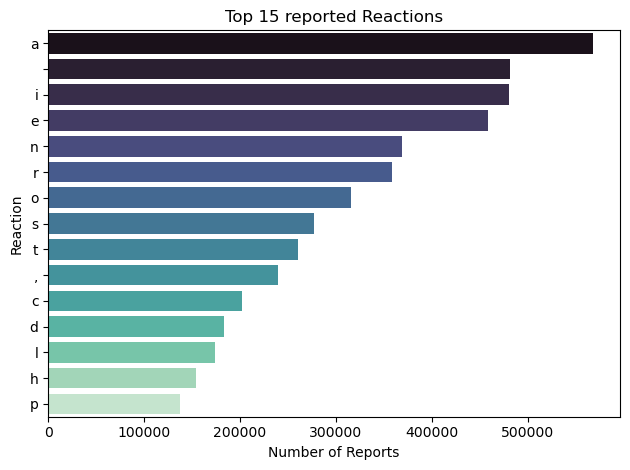

In [191]:
from collections import Counter

#flatten all reactions into one list
reaction_counter = Counter()

for reactions in df_event['reactions'].dropna():
    reaction_counter.update(reactions)

reaction_freq = pd.DataFrame(reaction_counter.items(), columns=['reaction', 'count']).sort_values(by='count', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

top_15 = reaction_freq.head(15)
sns.barplot(data=top_15, y='reaction', x='count', palette='mako')
plt.title('Top 15 reported Reactions')
plt.xlabel('Number of Reports')
plt.ylabel('Reaction')
plt.tight_layout()
plt.show()